In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres" 
SQL_IP = "localhost"
PORT = 5432
DATABASE = "project_krivers_apatil_group15" # change this

In [3]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# INSPECT

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
-----------
contact_id REAL
first_name VARCHAR(20)
last_name VARCHAR(20)
email VARCHAR(80)
last_updated TIMESTAMP

campaign
-----------
cf_id REAL
contact_id REAL
company_name VARCHAR(120)
description VARCHAR(120)
goal REAL
pledged REAL
outcome VARCHAR(12)
backers_count REAL
country VARCHAR(4)
currency VARCHAR(4)
launch_date DATE
end_date DATE
staff_pick BOOLEAN
spotlight BOOLEAN
category_id VARCHAR(4)
subcategory_id VARCHAR(20)
last_updated TIMESTAMP

category
-----------
category_id VARCHAR(4)
category VARCHAR(20)
last_updated TIMESTAMP

subcategory
-----------
subcategory_id VARCHAR(8)
subcategory VARCHAR(20)
last_updated TIMESTAMP



In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.contacts'>, <class 'sqlalchemy.ext.automap.campaign'>, <class 'sqlalchemy.ext.automap.category'>, <class 'sqlalchemy.ext.automap.subcategory'>]


In [6]:
query = """
    SELECT
        *
    FROM
contacts;
"""

df1 = pd.read_sql(text(query), con=engine)
df1.head()

,contact_id,first_name,last_name,email,last_updated
0,4661.0,Cecilia,Velasco,cecilia.velasco@rodrigues.fr,2024-07-16 11:21:28.020748
1,3765.0,Mariana,Ellis,mariana.ellis@rossi.org,2024-07-16 11:21:28.020748
2,4187.0,Sofie,Woods,sofie.woods@riviere.com,2024-07-16 11:21:28.020748
3,4941.0,Jeanette,Iannotti,jeanette.iannotti@yahoo.com,2024-07-16 11:21:28.020748
4,2199.0,Samuel,Sorgatz,samuel.sorgatz@gmail.com,2024-07-16 11:21:28.020748


In [11]:
query = """
    SELECT
        *
    FROM
campaign;
"""

df2 = pd.read_sql(text(query), con=engine)
df2.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category_id,subcategory_id,last_updated
0,147.0,4661.0,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0.0,CA,CAD,2020-02-13,2021-03-01,False,False,1,1,2024-07-16 11:21:43.146832
1,1621.0,3765.0,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158.0,US,USD,2021-01-25,2021-05-25,False,True,2,2,2024-07-16 11:21:43.146832
2,1812.0,4187.0,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425.0,AU,AUD,2020-12-17,2021-12-30,False,False,3,3,2024-07-16 11:21:43.146832
3,2156.0,4941.0,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24.0,US,USD,2021-10-21,2022-01-17,False,False,2,2,2024-07-16 11:21:43.146832
4,1365.0,2199.0,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53.0,US,USD,2020-12-21,2021-08-23,False,False,4,4,2024-07-16 11:21:43.146832


In [12]:
query = """
    SELECT
        *
    FROM
category;
"""

df3 = pd.read_sql(text(query), con=engine)
df3.head()

,category_id,category,last_updated
0,1,food,2024-07-16 11:21:34.411140
1,2,music,2024-07-16 11:21:34.411140
2,3,technology,2024-07-16 11:21:34.411140
3,4,theater,2024-07-16 11:21:34.411140
4,5,film & video,2024-07-16 11:21:34.411140


In [13]:
query = """
    SELECT
        *
    FROM
subcategory;
"""

df3 = pd.read_sql(text(query), con=engine)
df3.head()

,subcategory_id,subcategory,last_updated
0,1,food trucks,2024-07-16 11:21:37.312162
1,2,rock,2024-07-16 11:21:37.312162
2,3,web,2024-07-16 11:21:37.312162
3,4,plays,2024-07-16 11:21:37.312162
4,5,documentary,2024-07-16 11:21:37.312162


In [14]:
df2.outcome.value_counts()

outcome
successful    565
failed        364
canceled       57
live           14
Name: count, dtype: int64

In [16]:
df2.describe()

,cf_id,contact_id,goal,pledged,backers_count,last_updated
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,1585.743000,3751.434000,43983.100000,42748.055000,727.005000,2024-07-16 11:21:43.146831872
min,23.000000,1235.000000,100.000000,0.000000,0.000000,2024-07-16 11:21:43.146832
25%,758.750000,2502.750000,4200.000000,5911.250000,86.000000,2024-07-16 11:21:43.146831872
50%,1571.500000,3706.500000,8300.000000,11950.000000,184.500000,2024-07-16 11:21:43.146831872
75%,2402.250000,4994.250000,80625.000000,66294.250000,923.750000,2024-07-16 11:21:43.146831872
max,3209.000000,6234.000000,199200.000000,199110.000000,7295.000000,2024-07-16 11:21:43.146832
std,926.944534,1431.743284,58962.425595,57415.481551,1137.723135,NaN


In [17]:
df2.staff_pick.value_counts()

staff_pick
False    951
True      49
Name: count, dtype: int64

In [18]:
df2.spotlight.value_counts()

spotlight
False    732
True     268
Name: count, dtype: int64

In [117]:
query = """
    SELECT
        ca.goal,
        ca.pledged,
        cat.category,
        ca.spotlight,
        ca.staff_pick
    FROM
        campaign ca
    INNER Join
        category cat
    ON
        ca.category_id = cat.category_id
    Where 
        ca.outcome = 'successful'
        
;
"""

vis1_df = pd.read_sql(text(query), con=engine)
vis1_df = vis1_df.sort_values(by="goal", ascending=False)

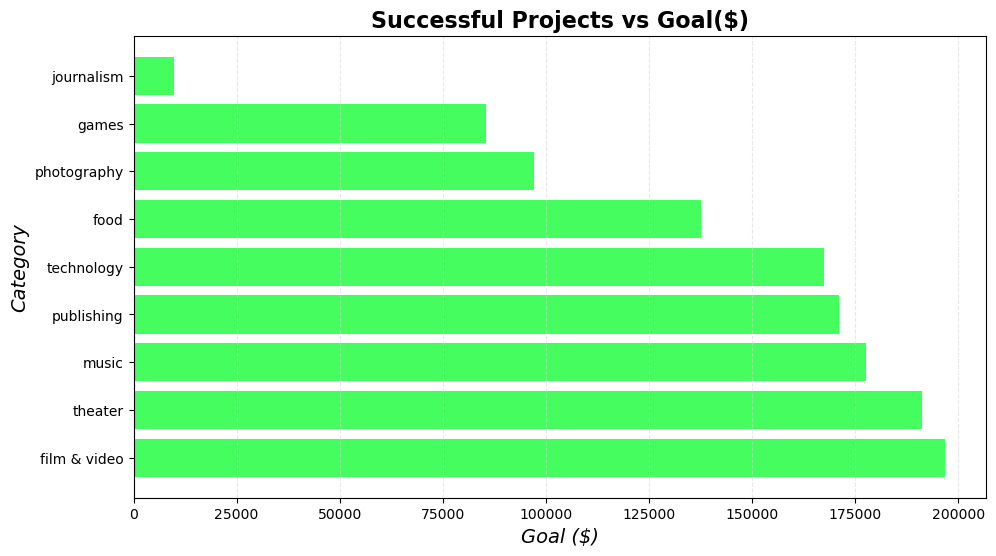

In [118]:

y = vis1_df["goal"]
x = vis1_df["category"]


# Step 2: Create the Canvas
plt.figure(figsize=(11,6))

# Step 3: Create the skeleton plot
plt.barh(x, y, color="#46FD5F", label='goal')
# plt.barh(x, y2, color= "#982121", label='pledged')

# Step 4: Customization
plt.xlabel("Goal ($)", fontsize=14, fontstyle="italic")
plt.ylabel("Category", fontsize=14, fontstyle="italic")
plt.title("Successful Projects vs Goal($)", fontsize=16, fontweight="bold")
# plt.ylim(100000, 300000)

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)
plt.xticks(rotation=0)

# Step 5: Show/Save
plt.show()

In [119]:
# Save references to each table
Contacts = Base.classes.contacts
Campaign = Base.classes.campaign
Category = Base.classes.category
Subcategory = Base.classes.subcategory

In [120]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [121]:
df2["launch_date"] = pd.to_datetime(df2["launch_date"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cf_id           1000 non-null   float64       
 1   contact_id      1000 non-null   float64       
 2   company_name    1000 non-null   object        
 3   description     1000 non-null   object        
 4   goal            1000 non-null   float64       
 5   pledged         1000 non-null   float64       
 6   outcome         1000 non-null   object        
 7   backers_count   1000 non-null   float64       
 8   country         1000 non-null   object        
 9   currency        1000 non-null   object        
 10  launch_date     1000 non-null   datetime64[ns]
 11  end_date        1000 non-null   object        
 12  staff_pick      1000 non-null   bool          
 13  spotlight       1000 non-null   bool          
 14  category_id     1000 non-null   object        
 15  subca

In [122]:
# Calculate the date one year from the last date in data set.
# start_date = datetime.date(2016, 8, 23)
from sqlalchemy import or_
from sqlalchemy import extract
# Perform a query to retrieve the data and tobs scores
results = session.query(Campaign.outcome, extract("month", Campaign.launch_date), Category.category).\
    filter(Campaign.category_id ==  Category.category_id).\
    filter(or_(Campaign.outcome == "successful", Campaign.outcome == "failed")).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
vis2_df = pd.DataFrame(results,columns = ["outcome","launch_month","category"])


# Use Pandas Plotting with Matplotlib to plot the data
vis2_df.head()
# df8.info()

,outcome,launch_month,category
0,failed,2,food
1,successful,1,music
2,successful,12,technology
3,failed,10,music
4,failed,12,theater


In [123]:
vis2_df["outcome"] = vis2_df["outcome"].replace("failed", 1)
vis2_df["outcome"] = vis2_df["outcome"].replace("successful", 2)

In [124]:
vis2_df.outcome.value_counts()

outcome
2    565
1    364
Name: count, dtype: int64

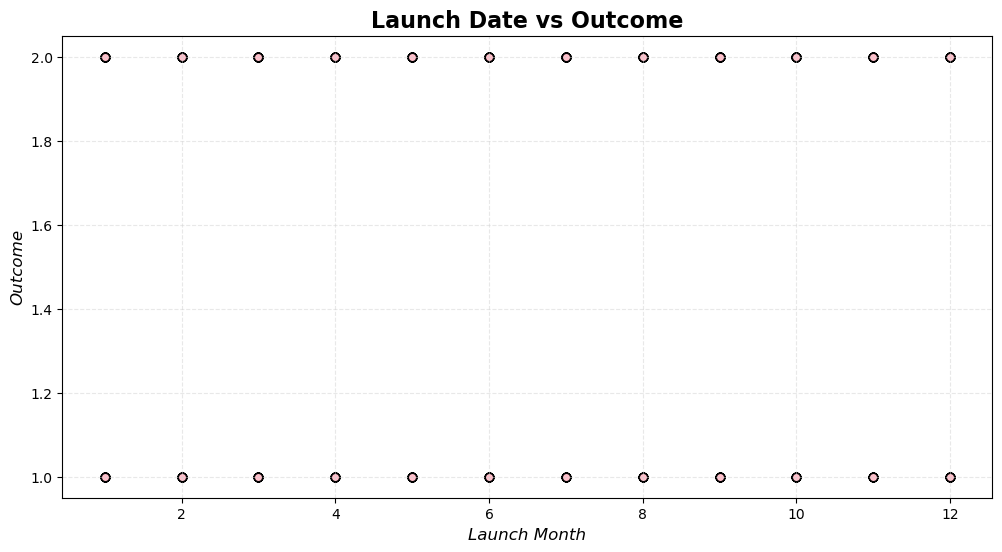

In [125]:
# Step 1: Get the Data
x = vis2_df.launch_month
y = vis2_df.outcome
# s = vis2_df.weight

# Step 2: Make the canvas
plt.figure(figsize=(12, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="pink", edgecolor="black")
# plt.scatter(x, y, facecolor="pink", edgecolor="black", s=s/25)
# Step 4: Customizations
plt.xlabel("Launch Month", fontsize=12, fontstyle="italic")
plt.ylabel("Outcome", fontsize=12, fontstyle="italic")
plt.title("Launch Date vs Outcome", fontweight="bold", fontsize=16)

# plt.xlim(0, 250)
# plt.ylim(0, 50)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

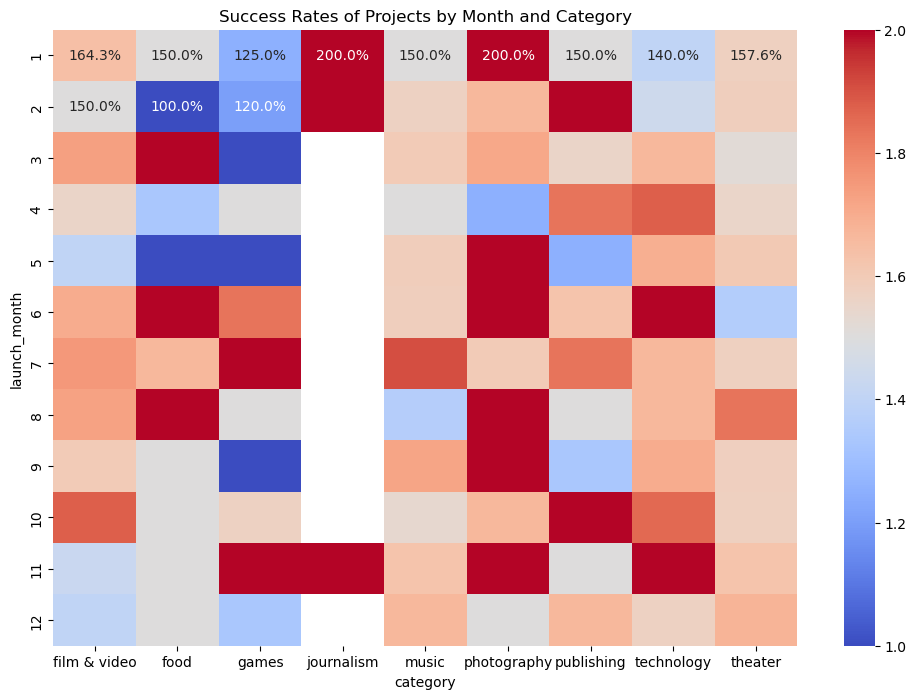

In [126]:
# Assuming you have a DataFrame 'df' with columns for month, category, and project outcome (success/failure)
# Create a pivot table to summarize the success rates by month and category
pivot_table = vis2_df.pivot_table(index='launch_month', columns='category', values='outcome', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1%')
plt.title('Success Rates of Projects by Month and Category')
plt.show()

In [133]:
staff = vis1_df.groupby(["category"])["goal"].sum()
staff

category
film & video    2612400.0
food             399600.0
games            373600.0
journalism        25700.0
music           2798000.0
photography      374800.0
publishing      1074000.0
technology      1875300.0
theater         5385600.0
Name: goal, dtype: float64

In [136]:
staff.describe()

count    9.000000e+00
mean     1.657667e+06
std      1.733422e+06
min      2.570000e+04
25%      3.748000e+05
50%      1.074000e+06
75%      2.612400e+06
max      5.385600e+06
Name: goal, dtype: float64

In [137]:
# Step 1: get the data
x = staff["goal"]

# create the plot
plt.figure(figsize=(10,6))
sns.violinplot(data=x, color="#EF8354")

# customizations
plt.xlabel("a", fontstyle="italic", fontsize=12)
plt.ylabel("y", fontstyle="italic", fontsize=12)
# plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

KeyError: 'goal'